# RED WINE DATA PREDICTION

In [1]:
## import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sklearn

In [22]:
dataset = pd.read_csv('/content/winequality-red.csv')  ## getting data
dataset.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

### EDA

In [23]:
dataset.shape

(1599, 12)

In [24]:
dataset.drop_duplicates(inplace=True)
dataset.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
5      9.4        5

In [25]:
dataset.shape

(1359, 12)

In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [27]:
dataset['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [28]:
dataset.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1359.000000       1359.000000  1359.000000     1359.000000   
mean        8.310596          0.529478     0.272333        2.523400   
std         1.736990          0.183031     0.195537        1.352314   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.430000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1359.000000          1359.000000           1359.000000  1359.000000   
mean      0.088124            15.893304             46.825975     0.996709   
std       0.049377            10.447270             33.408946     0.001869   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996700   
75%       0.091000            21.000000             63.000000     0.997820   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1359.000000  1359.000000  1359.000000  1359.000000  
mean      3.309787     0.658705    10.432315     5.623252  
std       0.155036     0.170667     1.082065     0.823578  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

### Observetion
* There are no null value in Dataset
* All feature have numeric data
* Free sulfur dioxide and total sulfur dioxide have significantly large diffrent between 3rd Qurtail and max value that means there have outlier and skewness

In [29]:
dataset.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [30]:
df = dataset.copy()
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
5      9.4        5

In [31]:
## feature engineearing

df["quality_class"] = np.where(df["quality"]>6,"good","not good")
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality quality_class  
0      9.4        5      not good  
1      9.8        5      not good  
2      9.8        5      not good  
3      9.8        6      not good  
5      9.4        5      not good

In [32]:
df.drop("quality",axis=1,inplace=True)

In [33]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol quality_class  
0      9.4      not good  
1      9.8      not good  
2      9.8      not good  
3      9.8      not good  
5      9.4      not good

In [34]:
df['citric acid'].groupby(df['quality_class']).size()

quality_class
good         184
not good    1175
Name: citric acid, dtype: int64

* From above data is imbalance

In [35]:
columns = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
columns

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

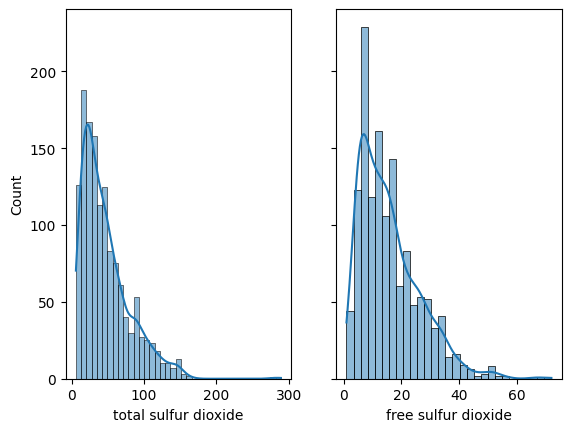

In [36]:
fig, (ax1, ax2) = plt.subplots(ncols=2,sharey=True)
sns.histplot(df['total sulfur dioxide'],kde=True,ax=ax1)
sns.histplot(df['free sulfur dioxide'],kde=True,ax=ax2)
plt.show()

* According to graph data is skwed

In [37]:
from scipy.stats import boxcox
for col in columns:
    df[col]=boxcox(df[col],0.5)

df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       3.440588         -0.326680    -2.000000        0.756810  -1.448638   
1       3.585696         -0.123834    -2.000000        1.224903  -1.373901   
2       3.585696         -0.256440    -1.600000        1.033150  -1.393370   
3       4.693280         -0.941699    -0.503337        0.756810  -1.452277   
5       3.440588         -0.375192    -2.000000        0.683282  -1.452277   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             4.633250              9.661904 -0.002201  1.746999  -0.503337   
1             8.000000             14.370706 -0.003203  1.577709  -0.350758   
2             5.745967             12.696938 -0.003002  1.611094  -0.387548   
3             6.246211             13.491933 -0.002001  1.555278  -0.476845   
5             5.211103             10.649111 -0.002201  1.746999  -0.503337   

    alcohol quality_class  
0  4.131884      not good  
1  4.260990      not good  
2  4.260990      not good  
3  4.260990      not good  
5  4.131884      not good

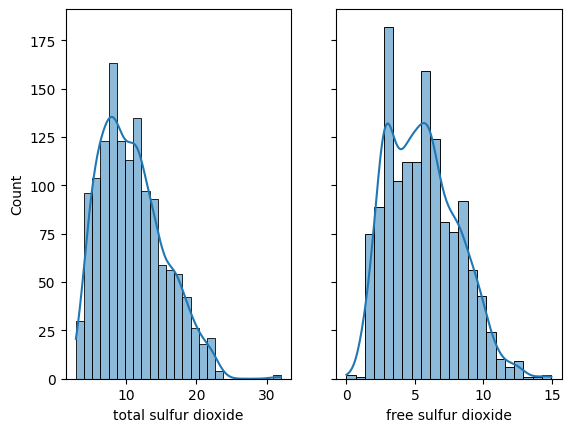

In [38]:
fig, (ax1, ax2) = plt.subplots(ncols=2,sharey=True)
sns.histplot(df['total sulfur dioxide'],kde=True,ax=ax1)
sns.histplot(df['free sulfur dioxide'],kde=True,ax=ax2)
plt.show()

<Axes: ylabel='total sulfur dioxide'>

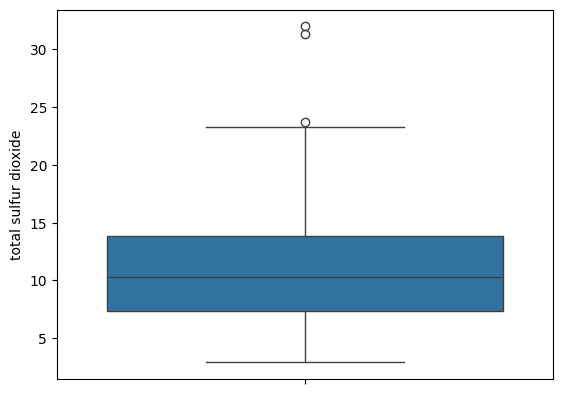

In [39]:
sns.boxplot(df['total sulfur dioxide'])

In [40]:
from scipy.stats import zscore

In [41]:
z = np.abs(zscore(df.drop("quality_class",axis=1)))
z.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.504905          0.960393     2.020094        0.539605   0.249140   
1       0.256794          1.773634     2.020094        0.177174   0.371399   
2       0.256794          1.241994     1.156230        0.116453   0.209748   
3       1.637002          1.505311     1.212189        0.539605   0.279358   
5       0.504905          0.765900     2.020094        0.652197   0.279358   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.371397              0.272858  0.584323  1.286494   0.598867   
1             0.968084              0.760588  0.049206  0.703745   0.194826   
2             0.071303              0.393245  0.156251  0.311255   0.003447   
3             0.270329              0.567723  0.691315  0.967452   0.461061   
5             0.141495              0.056194  0.584323  1.286494   0.598867   

   alcohol  
0  0.97180  
1  0.57918  
2  0.57918  
3  0.57918  
5  0.97180

In [42]:
np.where(z>3)

(array([  11,   15,   15,   17,   30,   38,   39,   41,   75,   75,   77,
          80,   82,   85,   87,   96,   96,  114,  115,  127,  131,  135,
         135,  135,  144,  145,  150,  150,  159,  202,  202,  211,  214,
         226,  226,  241,  245,  252,  282,  295,  346,  346,  361,  363,
         385,  385,  393,  408,  420,  420,  433,  437,  473,  473,  483,
         483,  485,  485,  491,  492,  510,  516,  528,  534,  555,  562,
         565,  565,  565,  582,  599,  602,  626,  632,  652,  671,  672,
         710,  722,  722,  764,  764,  781,  786,  866,  888,  895,  895,
         912,  918,  918,  920,  920,  948,  994, 1013, 1052, 1060, 1060,
        1073, 1081, 1081, 1082, 1082, 1106, 1121, 1123, 1123, 1125, 1162,
        1165, 1216, 1216, 1250, 1250, 1325, 1325, 1325, 1332, 1336, 1350]),
 array([ 9,  4,  9,  4,  3,  4,  9,  8,  4,  9,  4,  9,  9,  9,  8,  4,  9,
         1,  1, 10,  4,  4,  8,  9,  3,  3,  4,  9,  4,  4,  9,  4,  0,  4,
         9,  3,  4,  4,  3,  9, 

In [43]:
z.iloc[13,9]

1.648676302330019

In [44]:
z.iloc[17,4]

4.869985775223522

In [45]:
df = df[(z<3).all(axis=1)]
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       3.440588         -0.326680    -2.000000        0.756810  -1.448638   
1       3.585696         -0.123834    -2.000000        1.224903  -1.373901   
2       3.585696         -0.256440    -1.600000        1.033150  -1.393370   
3       4.693280         -0.941699    -0.503337        0.756810  -1.452277   
5       3.440588         -0.375192    -2.000000        0.683282  -1.452277   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             4.633250              9.661904 -0.002201  1.746999  -0.503337   
1             8.000000             14.370706 -0.003203  1.577709  -0.350758   
2             5.745967             12.696938 -0.003002  1.611094  -0.387548   
3             6.246211             13.491933 -0.002001  1.555278  -0.476845   
5             5.211103             10.649111 -0.002201  1.746999  -0.503337   

    alcohol quality_class  
0  4.131884      not good  
1  4.260990      not good  
2  4.260990      not good  
3  4.260990      not good  
5  4.131884      not good

In [46]:
df.shape

(1267, 12)

In [47]:
# lable encoding
df['quality_class'] = np.where(df['quality_class'] == 'good',1,0)
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       3.440588         -0.326680    -2.000000        0.756810  -1.448638   
1       3.585696         -0.123834    -2.000000        1.224903  -1.373901   
2       3.585696         -0.256440    -1.600000        1.033150  -1.393370   
3       4.693280         -0.941699    -0.503337        0.756810  -1.452277   
5       3.440588         -0.375192    -2.000000        0.683282  -1.452277   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             4.633250              9.661904 -0.002201  1.746999  -0.503337   
1             8.000000             14.370706 -0.003203  1.577709  -0.350758   
2             5.745967             12.696938 -0.003002  1.611094  -0.387548   
3             6.246211             13.491933 -0.002001  1.555278  -0.476845   
5             5.211103             10.649111 -0.002201  1.746999  -0.503337   

    alcohol  quality_class  
0  4.131884              0  
1  4.260990              0  
2  4.260990              0  
3  4.260990              0  
5  4.131884              0

In [48]:
x = df.drop("quality_class",axis = 1)
x.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       3.440588         -0.326680    -2.000000        0.756810  -1.448638   
1       3.585696         -0.123834    -2.000000        1.224903  -1.373901   
2       3.585696         -0.256440    -1.600000        1.033150  -1.393370   
3       4.693280         -0.941699    -0.503337        0.756810  -1.452277   
5       3.440588         -0.375192    -2.000000        0.683282  -1.452277   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             4.633250              9.661904 -0.002201  1.746999  -0.503337   
1             8.000000             14.370706 -0.003203  1.577709  -0.350758   
2             5.745967             12.696938 -0.003002  1.611094  -0.387548   
3             6.246211             13.491933 -0.002001  1.555278  -0.476845   
5             5.211103             10.649111 -0.002201  1.746999  -0.503337   

    alcohol  
0  4.131884  
1  4.260990  
2  4.260990  
3  4.260990  
5  4.131884

In [49]:
y = df.iloc[:,-1]
y

0       0
1       0
2       0
3       0
5       0
       ..
1593    0
1594    0
1595    0
1597    0
1598    0
Name: quality_class, Length: 1267, dtype: int64

In [50]:
print("x :",x.shape)
print("y :",y.shape)

x : (1267, 11)
y : (1267,)


In [51]:
print(y.value_counts())

0    1096
1     171
Name: quality_class, dtype: int64


In [52]:
from imblearn.over_sampling import SMOTE

In [53]:
smt =SMOTE()
x,y=smt.fit_resample(x,y)

In [54]:
print("x :",x.shape)
print("y :",y.shape)

x : (2192, 11)
y : (2192,)


In [55]:
print(y.value_counts())

0    1096
1    1096
Name: quality_class, dtype: int64


###### feature selection

<Axes: >

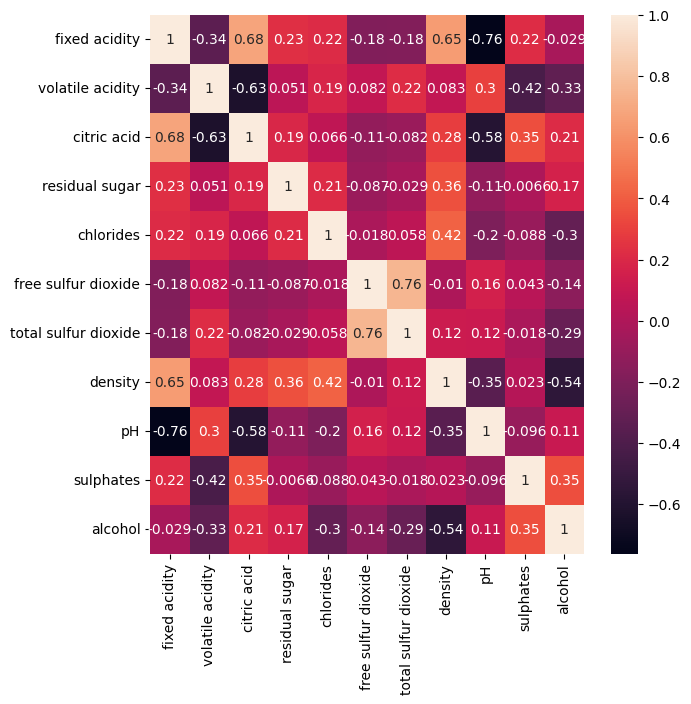

In [56]:
plt.figure(figsize=(7,7))
sns.heatmap(x.corr(),annot=True)

In [57]:
x.drop(["citric acid",'free sulfur dioxide','density'],axis = 1,inplace=True)

In [58]:
x.head()

fixed acidity  volatile acidity  residual sugar  chlorides  \
0       3.440588         -0.326680        0.756810  -1.448638   
1       3.585696         -0.123834        1.224903  -1.373901   
2       3.585696         -0.256440        1.033150  -1.393370   
3       4.693280         -0.941699        0.756810  -1.452277   
4       3.440588         -0.375192        0.683282  -1.452277   

   total sulfur dioxide        pH  sulphates   alcohol  
0              9.661904  1.746999  -0.503337  4.131884  
1             14.370706  1.577709  -0.350758  4.260990  
2             12.696938  1.611094  -0.387548  4.260990  
3             13.491933  1.555278  -0.476845  4.260990  
4             10.649111  1.746999  -0.503337  4.131884

In [59]:
x.columns

Index(['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides',
       'total sulfur dioxide', 'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
st = StandardScaler()
x_new=st.fit_transform(x)
x_new

array([[-0.65737824,  1.37153124, -0.63700538, ...,  1.53574203,
        -0.96277257, -1.38261358],
       [-0.40071173,  2.21535661,  0.29510243, ..., -0.73874904,
        -0.00970068, -1.00006274],
       [-0.40071173,  1.66372245, -0.08673251, ..., -0.2902025 ,
        -0.23951025, -1.00006274],
       ...,
       [ 0.47586073, -1.18757035,  0.16894865, ..., -0.53032081,
         2.41481237,  0.93322347],
       [ 0.56949682,  0.41534864, -0.02792552, ..., -0.66752719,
         0.43332379,  0.37431651],
       [-0.08383478, -1.40194941, -0.93396347, ...,  0.05313005,
         0.56994348,  0.83229422]])

In [62]:
x_new.shape

(2192, 8)

In [63]:
x= pd.DataFrame(data=x_new,columns=['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides',
       'total sulfur dioxide', 'pH', 'sulphates', 'alcohol'])
x.head()

fixed acidity  volatile acidity  residual sugar  chlorides  \
0      -0.657378          1.371531       -0.637005  -0.063201   
1      -0.400712          2.215357        0.295102   1.030498   
2      -0.400712          1.663722       -0.086733   0.745590   
3       1.558382         -1.186904       -0.637005  -0.116460   
4      -0.657378          1.169723       -0.783421  -0.116460   

   total sulfur dioxide        pH  sulphates   alcohol  
0             -0.028534  1.535742  -0.962773 -1.382614  
1              1.112754 -0.738749  -0.009701 -1.000063  
2              0.707077 -0.290202  -0.239510 -1.000063  
3              0.899763 -1.040120  -0.797295 -1.000063  
4              0.210738  1.535742  -0.962773 -1.382614

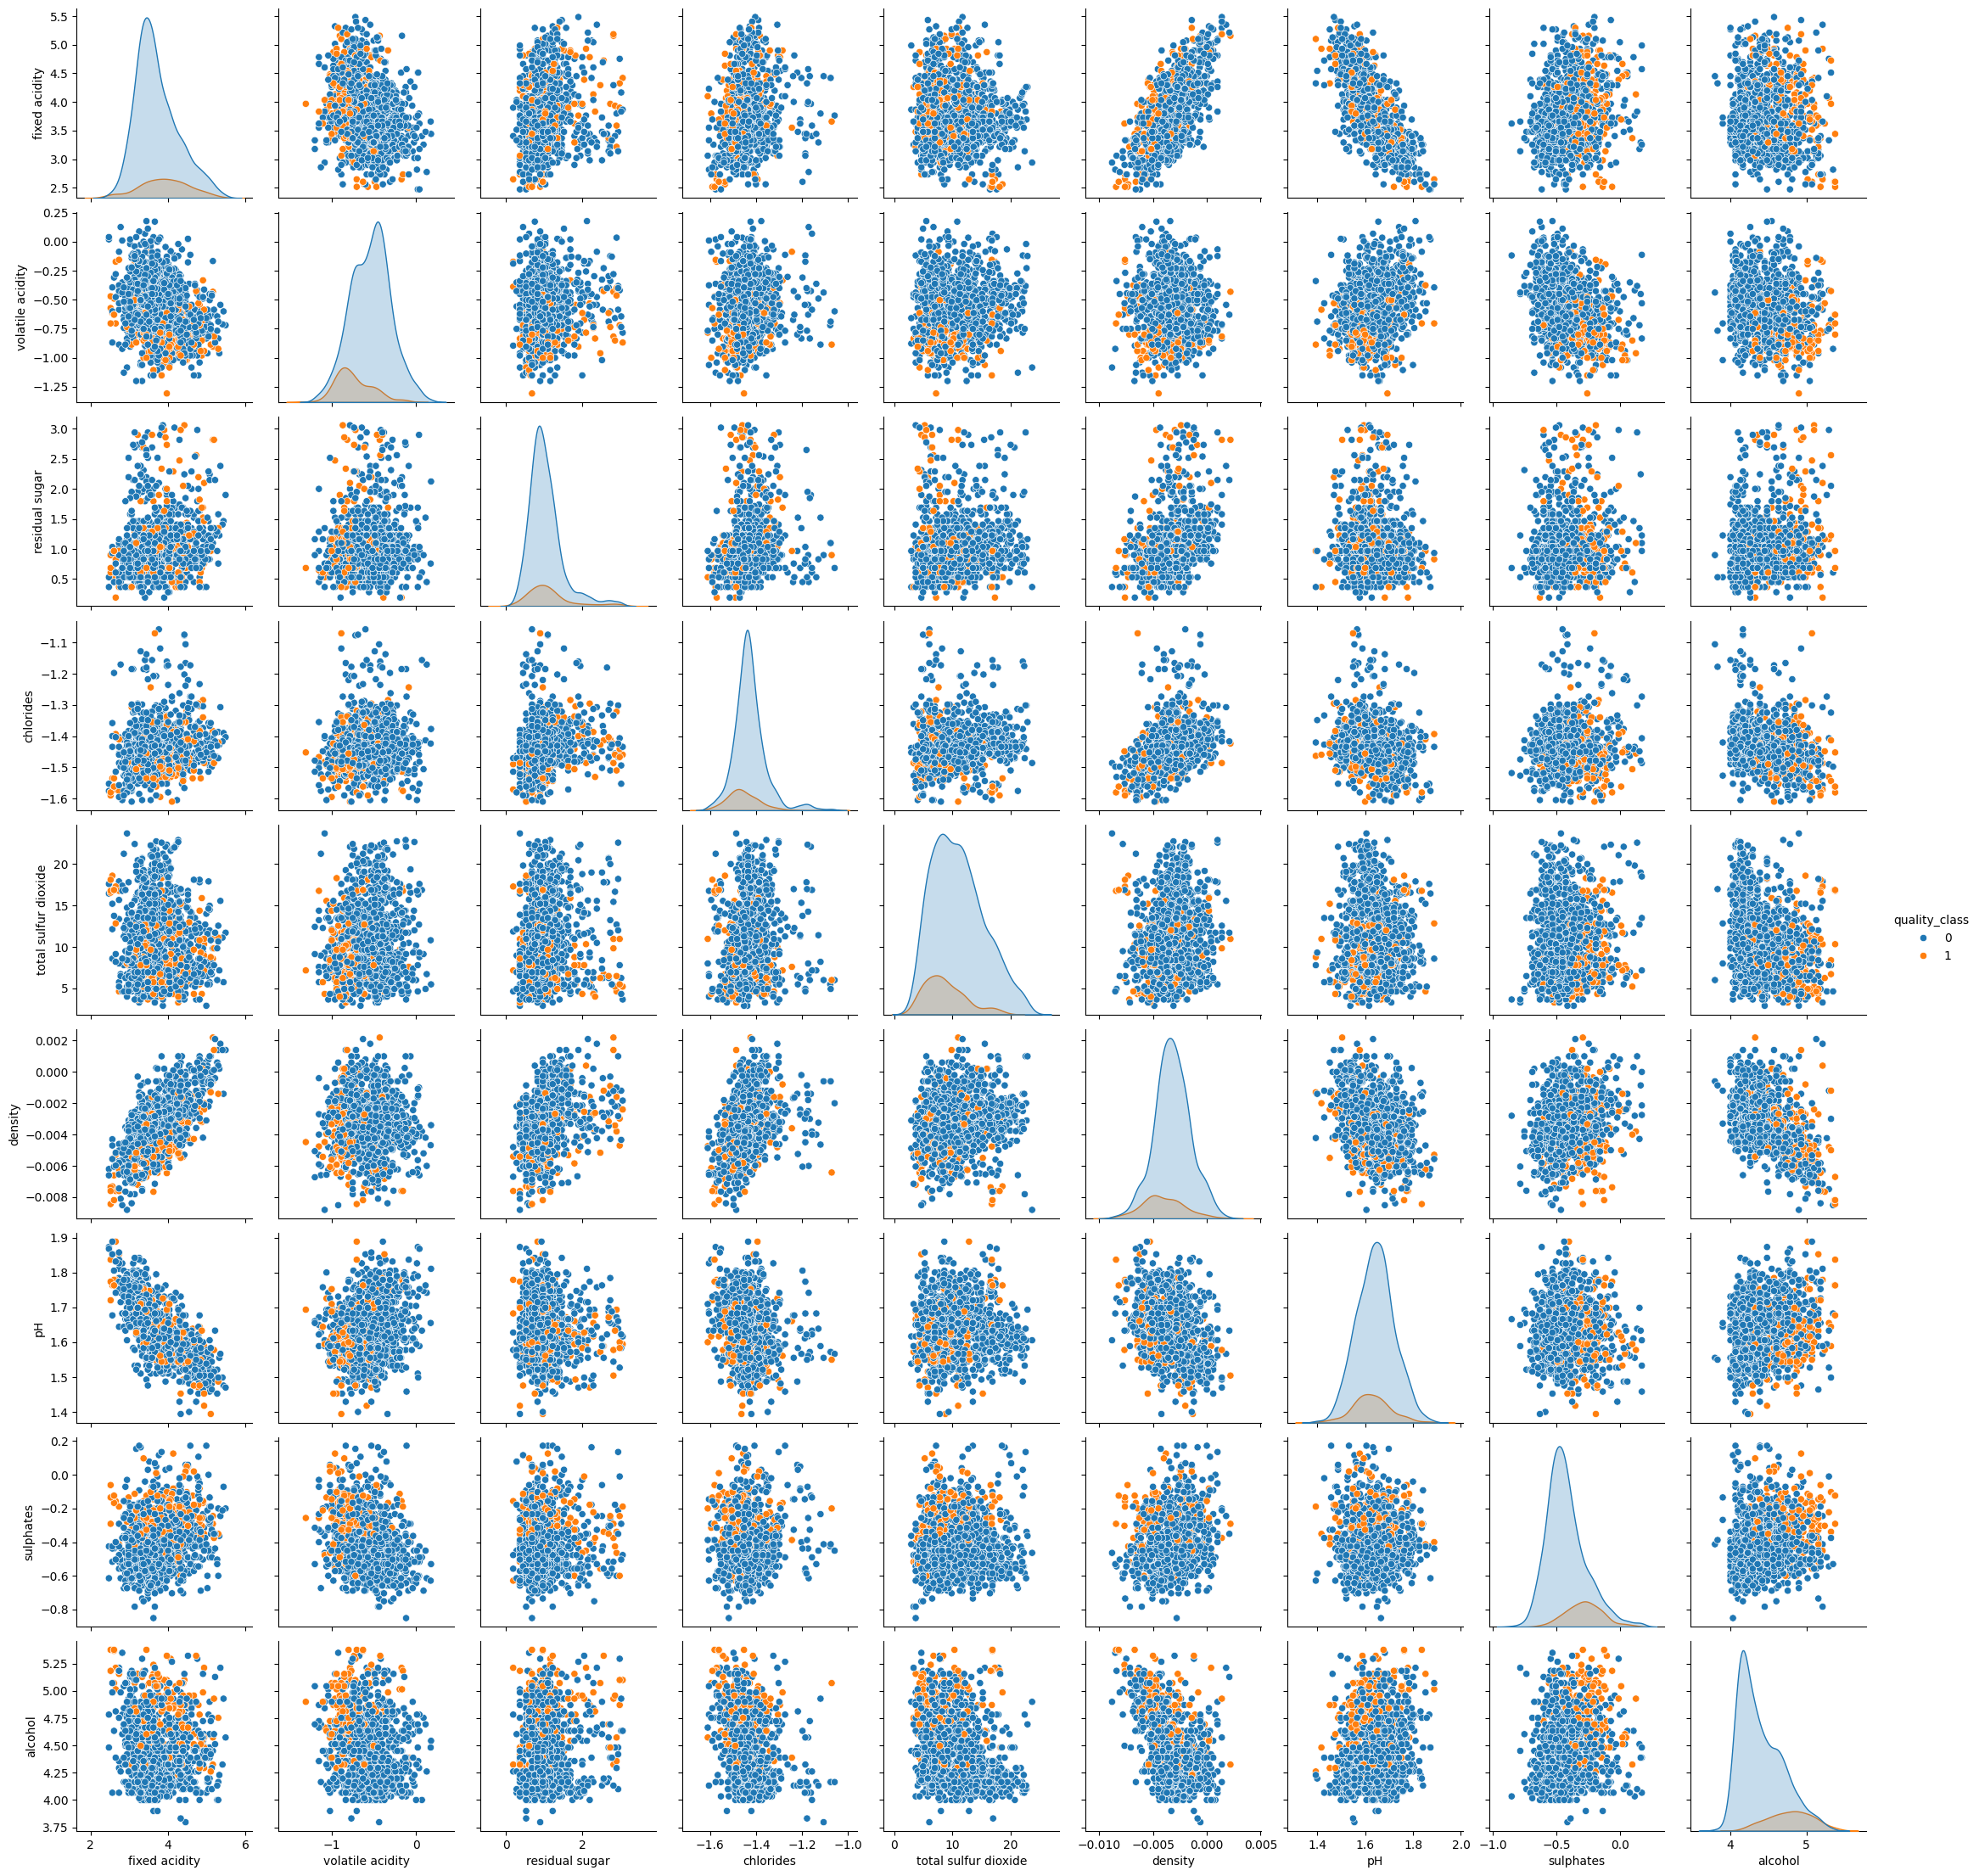

In [64]:
sns.pairplot(df.drop(["citric acid",'free sulfur dioxide'],axis=1),hue='quality_class')

In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42)

In [66]:
print("x_train :",x_train.shape)
print('x_test :',x_test.shape)
print("y_train :",y_train.shape)
print('y_test :',y_test.shape)

x_train : (1534, 8)
x_test : (658, 8)
y_train : (1534,)
y_test : (658,)


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score

In [68]:
models = {
    'lg' : LogisticRegression(),
    'rf' : RandomForestClassifier(),
    'knn':KNeighborsClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)

    # make prediction
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    print(list(models.values())[i])
    #train data confusion metrics
    print("accuracy_score:",accuracy_score(y_train,y_train_pred))
    print("confusion_matrix\n",confusion_matrix(y_train,y_train_pred))
    print("\nclassification_report\n",classification_report(y_train,y_train_pred))

    #test data confusion metrics
    print("*"*40)
    print("accuracy_score:",accuracy_score(y_test,y_test_pred))
    print("confusion_matrix\n",confusion_matrix(y_test,y_test_pred))
    print("\nclassification_report\n",classification_report(y_test,y_test_pred))
    y_pred_prob = model.predict_proba(x_test)[:, 1]
    print('roc_auc score:',roc_auc_score(y_test, y_pred_prob) )

    print("="*100)


LogisticRegression()
accuracy_score: 0.8370273794002607
confusion_matrix
 [[614 145]
 [105 670]]

classification_report
               precision    recall  f1-score   support

           0       0.85      0.81      0.83       759
           1       0.82      0.86      0.84       775

    accuracy                           0.84      1534
   macro avg       0.84      0.84      0.84      1534
weighted avg       0.84      0.84      0.84      1534

****************************************
accuracy_score: 0.8343465045592705
confusion_matrix
 [[273  64]
 [ 45 276]]

classification_report
               precision    recall  f1-score   support

           0       0.86      0.81      0.83       337
           1       0.81      0.86      0.84       321

    accuracy                           0.83       658
   macro avg       0.84      0.83      0.83       658
weighted avg       0.84      0.83      0.83       658

roc_auc score: 0.9094262181424886
RandomForestClassifier()
accuracy_score: 1.0
confu

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
rfc = RandomForestClassifier(random_state=42)

In [71]:
parma_grid ={
    'n_estimators' : [50,80,100],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [8,10,12,14,16,18,20],
    'max_features':['sqrt', 'log2', None]
}

In [72]:
rfc_cv = GridSearchCV(estimator=rfc,param_grid=parma_grid,cv=5)
rfc_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [8, 10, 12, 14, 16, 18, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [50, 80, 100]})

In [73]:
rfc_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 18,
 'max_features': 'log2',
 'n_estimators': 80}

In [74]:
y_train_pred = rfc_cv.predict(x_train)
y_test_pred = rfc_cv.predict(x_test)

In [75]:
print("accuracy_score:",accuracy_score(y_train,y_train_pred))
print("confusion_matrix\n",confusion_matrix(y_train,y_train_pred))
print("\nclassification_report\n",classification_report(y_train,y_train_pred))

print("*"*40)
print("accuracy_score:",accuracy_score(y_test,y_test_pred))
print("confusion_matrix\n",confusion_matrix(y_test,y_test_pred))
print("\nclassification_report\n",classification_report(y_test,y_test_pred))
y_pred_prob = rfc_cv.predict_proba(x_test)[:, 1]
print('roc_auc score:',roc_auc_score(y_test, y_pred_prob) )

accuracy_score: 1.0
confusion_matrix
 [[759   0]
 [  0 775]]

classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       759
           1       1.00      1.00      1.00       775

    accuracy                           1.00      1534
   macro avg       1.00      1.00      1.00      1534
weighted avg       1.00      1.00      1.00      1534

****************************************
accuracy_score: 0.9057750759878419
confusion_matrix
 [[292  45]
 [ 17 304]]

classification_report
               precision    recall  f1-score   support

           0       0.94      0.87      0.90       337
           1       0.87      0.95      0.91       321

    accuracy                           0.91       658
   macro avg       0.91      0.91      0.91       658
weighted avg       0.91      0.91      0.91       658

roc_auc score: 0.9764598759440547


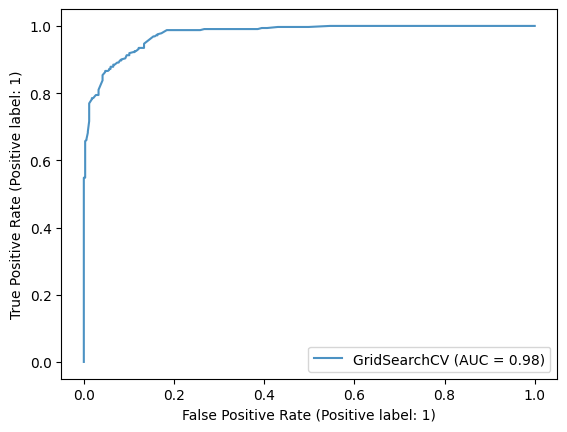

In [76]:
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(rfc_cv, x_test, y_test, alpha=0.8)

#### Acording Roc Curve
- The RandomForestClassifier emerges as the best model based on the ROC curve. It boasts an impressive (AUC (Area Under Curve)= value of 98%), signifying excellent performance. The other models, KNeighborsClassifier (AUC = 93%) and LogisticRegression(AUC = 90%), also exhibit good performance but fall short of the RandomForest’s prowess.

### Pridiction

In [77]:
def pred(x):
    X = np.array(x).reshape(1,-1)
    result = rfc_cv.predict(X)
    if result == 0:
        print("not good")
    else :
        print("good")

In [78]:
#ans :0

x =[7.8,0.76,2.3,0.092,54,3.26,0.65,9.8]
pred(x)

not good
